<h2 align="center"> <b>NLP-Probabilistic Models</b> </h2>

<h4 align="center"> <b>Autocorrect </h4>

**Auto-correct**:<br>
Example : "Happy Birthday **deah** friend!"<br>
here in this week we will only focus on correcting the mispelled word in the auto-correct and will not consider the context to suggested the possible correct word. <br>
Here is how it works:<br>
1. Identify the mispelled word
2. Find strings that are n minimum distance away(\_eah,d_ah,de_h,dea_)
3. Filter the possible words(deah,yeah,dear,dean....etc)
4. Calculate the word-probibility.

**STEP1 : Identify mispelled word**<br>
The word that is not there in the dictionary of the perticular language will be flagged as mispelled word.<br>

<i>for word not in vocab:<br>
 <p>  mispelled==True </p><i>

**STEP2 : Find strings n distance away**<br>
Here minimum edit distance is a measure of the minimum number of operations (insert/delete/switch/replace) are to be performed on a given string(incorrect) to convert it into a different string(correct). It's used to check the similarity between the two coparable strings.<br>
Examples:<br>
1. Insert = "to" : top, two,....
2. Delete = "hat" : ha, at, ht, .....
3. Swap = "eta" : eat, tea
4. Replace= "saw" : jaw, raw, paw, sat, sow...

**STEP3 : Filtering out the results**<br>
Among all the words that would get generated after considering the words formed by the n distance measure, we would have to filter out those words that are not part of the language dictionary and proceed with only those words which have definite meaning.

**STEP4 : Calculate word probabilities**<br>
Here we take a string corpus. say, "I am happy because I am learning". Here total number of words in the sentence=7. Probability of the word "am" is 2/7.For autocorrect also we choose the word with highest probability and replace the incorrect word with that word.

<h4 align="center"> <b>Minimum Edit Distance Algorithm </h>

LINK : https://www.youtube.com/watch?v=We3YDTzNXEk&ab_channel=TusharRoy-CodingMadeSimple <br>
There are mainly  types of operations in the minimum edit distance and each of the operation incur some edit cost. <br>
These costs are as follows:<br>
 - Edit cost of  Insert : 1
 - Edit cost of Delete : 1
 - Edit cost of Replace : 2<br>

 Example : <br>
 Take, the source string to be "PLAY" and target string to be "STAY".
 To convert from PLAY->STAY, we need to replace P with S and then L with T. So, the number of Replace operation=2, total edit cost or edit distance = (2*2). <br>
 <u>Our point of focus will be to minimise the edit cost.</u>



<h4 align="center"> <b>Parts of speech tagging </h4>

Example : <br>
Consider a string "Why not learn _______". Now, we need to figure out the word that will be most suitable to fill the gap. Now from english grammar we know that as the penaltimate word "learn" is a verb so it is most probably be followed by a Noun. So here the word that is to be used to fill the gap depends on the word before that. So here Marcovs Chain comes to the rescue.<br>
A Markov chain or Markov process is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event<br>
LINK :
- https://towardsdatascience.com/understanding-probability-and-statistics-markov-chains-ce5a6ece0042
- https://www.kdnuggets.com/2019/11/markov-chains-train-text-generation.html
- https://www.youtube.com/watch?v=RWkHJnFj5rY&ab_channel=NormalizedNerd<br>

In the example "Why not learn ___", lets say in the Marcov's chain we have 3 states {verb, noun, other}. Here depending upon the word previous the blank we will have something called **Transition Probabilities**. <br>
- If the previous word is verb, then the probability of the next word to be verb as well is 0.2 (let)
- similarly, If the previous word is verb, then the probability of the next word to be noun is 0.6 (let)
- lastly, If the previous word is verb, then the probability of the next word to be of any other POS is is 0.2 (let)<br>
  **Note:**
1. the sum of all the probabilities (0.2+0.6+0.2)=1.0
2. if there is no previous word present in the string then initial probabilities for each states are to be assigned. (Take initial probability of the initial string to be noun=0.7, verb=0.1 and other to be 0.2. Here also the sum of probability has to be 1).
3. Using these transition probabilities we can form something called **Transition Matrix** which looks similar to that of an actual matrix. <u>For number of states in the Markov's chain being n, the dimension of Transition Matrix will be **n+1,n**</u>



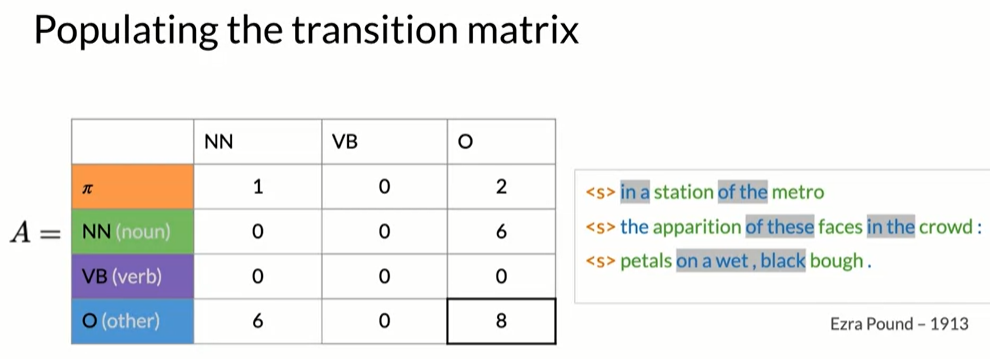

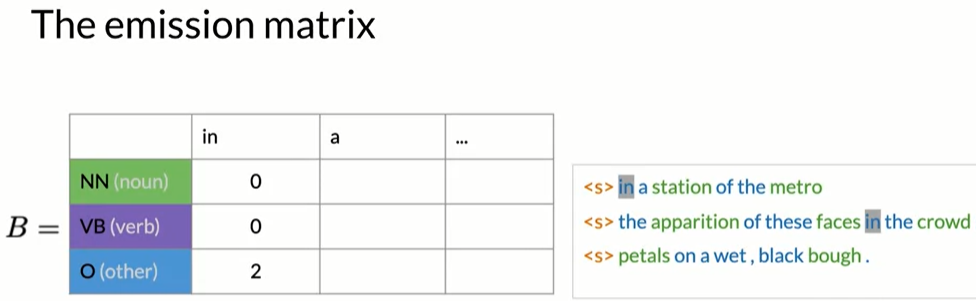

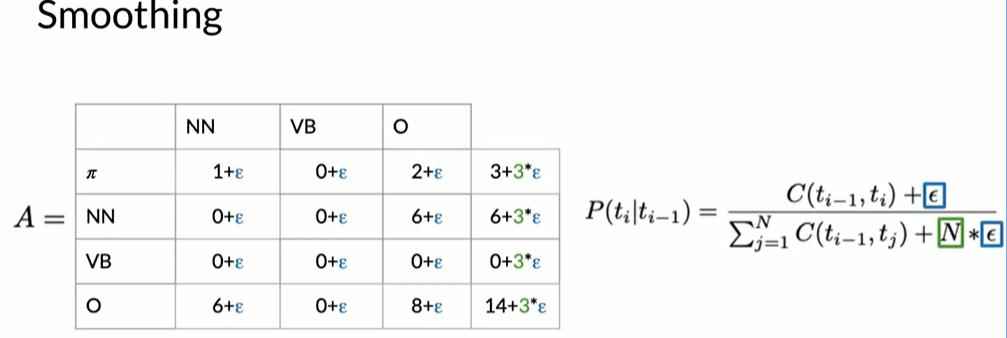

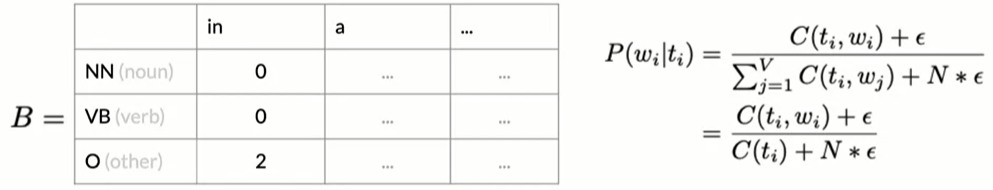

Here, The rows of the matrix represents the current state and the columns represents the next state.The numbers inside the matrix correspond to the number of times a part of speech tag shows up right after another one. The 4th Column indicates the sum of the row element of the reansition matrix which is used as denominator in finding the transition probabilities.
<br>
Unfortunately, sometimes you might not see two POS tags in front each other. This will give you a probability of 0. To solve this issue we use something called **Smoothing**.Now, as we can see in the example that the number of cases where a noun, verb or other following a verb is 0.So to find the probability we would have encountered a scenario of (0/0) but with the use of a small value denoted by epsilon, we can avoid this very circumstances.here N denotes number of Columns.C(ti,wi) is the count associated with how many times the tag ti
​is associated with the word wi
​


<h4 align="center"> <b>Viterbi Algorithm</b> </h4>

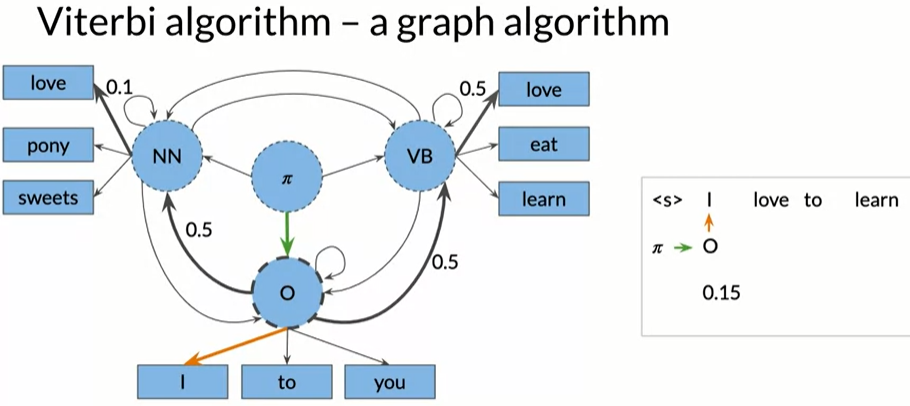

The transition probability to move from initial state (pi) to the "Other" POS tag is 0.5 and the emission probability of the word being "I" given that the POS is "Other" is 0.3. So the probability of the whole transition = 0.5*0.3=0.15.Now, given that the first state(POS) being "Other", the following state being "Noun" or "Verb" is 0.5 each. But given that the POS is Verb, the word being "love" has emission probability 0.5 and similarly for the second word being "love" given the POS is Noun has a probability of 0.1.
- From path 1 , Other->Verb->Love : Probability = 0.5*0.5=0.25
- From path 2, Other-> Noun -> Love : probability = 0.5*0.1=0.05<br>
As path 1 has greater probability, so we will proceed through that path.

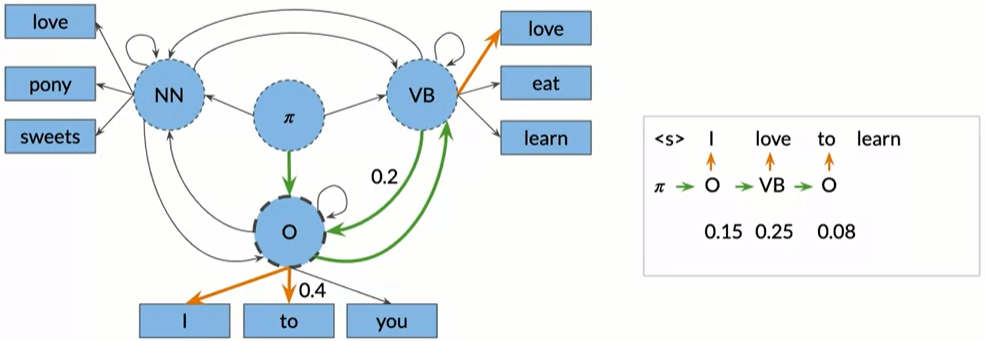

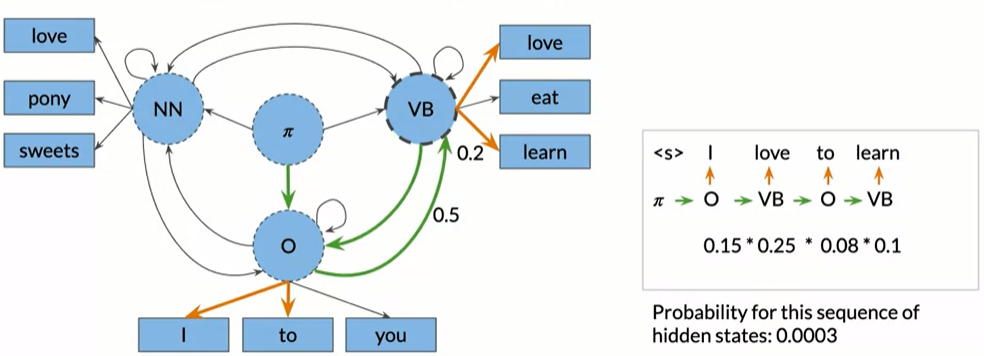

<h4><b>Applying Vitrobi Algorithm</b></h4><br>

1. **STEP1: Initialization :** <br>
As we transverse through each path and keep on calculating transition probabilities and emission probabilities as an intermediate step we form 2 auxiliary metrices C and D. <br>
- **Matrix C** holds intermediate optimal Probabilities.This matrix will have the probabilities that will tell you what part of speech each word belongs to.Matrix C has the dimension of (num_tags, num_words)
- **Matrix D** holds the indices of the visited states.Matrix D allows you to store the labels that represent the different states you are going through when finding the most likely sequence of POS tags for the given sequence of words w1,w2,w3,……,wK. At first you set the first column(di1) to 0, because you are not coming from any POS tag.


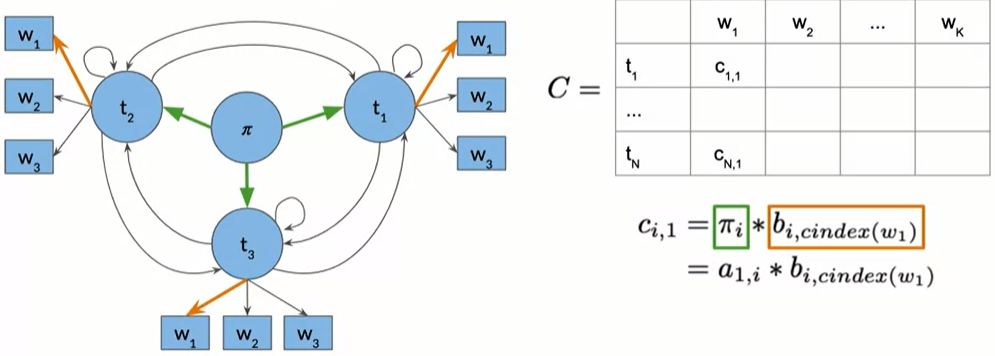

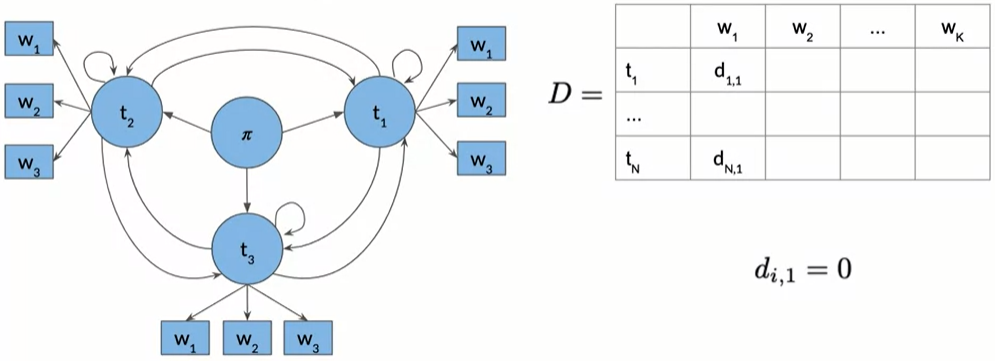

2. **STEP2: Forward Pass:**<br>

<br>
Note that the only difference between cij and dij s that in the former you compute the probability and in the latter you keep track of the index of the row where that probability came from. So you keep track of which kk was used to get that max probability.

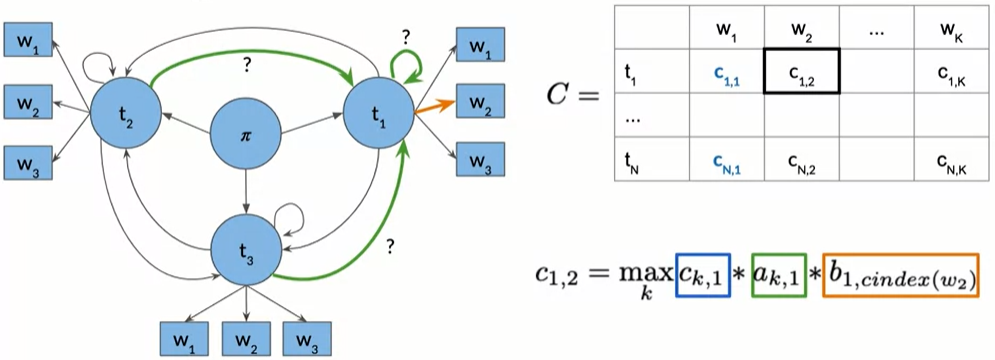

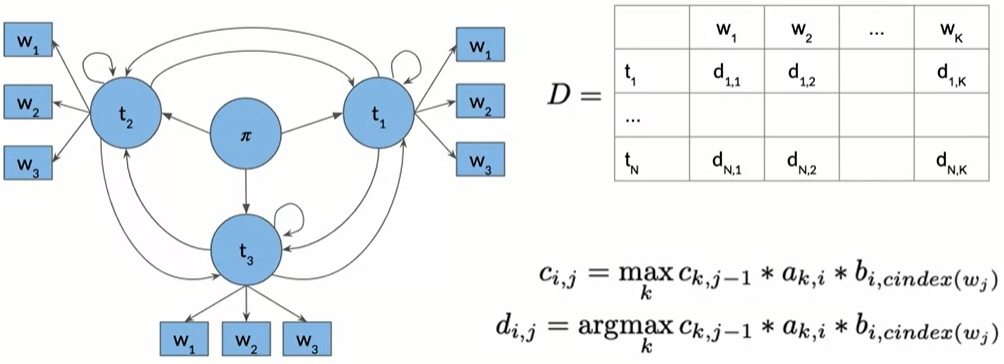

2. **STEP2: Backward Pass:**<br>
The equation above just gives you the index of the highest row in the last column of C. Once you have that, you can go ahead and start using your D matrix as follows.

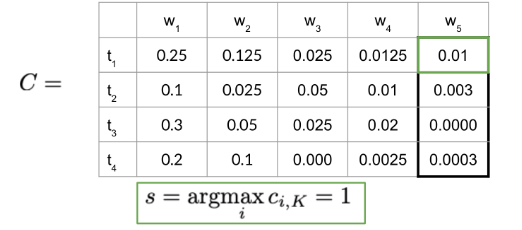

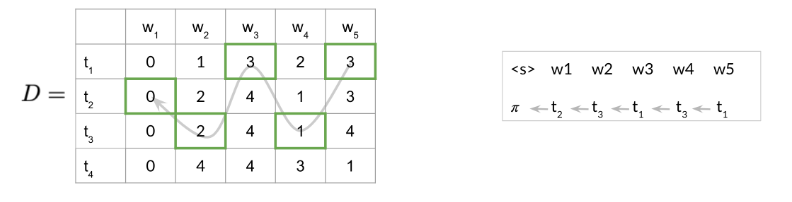

<h4 align="center"> <b>Autocomplete </h4>

**N-Gram**<br>
<u>N-Gram is a sequence of N words.</u><br>
Example : <br>
- Corpus = "I am happy because I am Learning"
- **Unigrams** = the unique words in the corpus. {I,am,happy,because,learning}
- **Bigrams** = the word pairs appearing side by side in the corpus. {I am, am happy, happy because, because I, am learning}
- **Trigrams** =3 words appearing side by side in the corpus . {I am happy, am happy because, happy because I, because I am, I am learning}

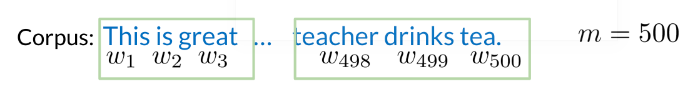

- To denote all the words in the corpus from w1 to wn : $w_{1}^{m}$=$w_{1}$*$w_{2}$*$w_{3}$*$w_{4}$*....*$w_{n-2}$*$w_{n-1}$$w_{n}$
- To denote a sub-sequence ie to denote the words in the corpus from w1 to w3 : $w_{1}^{3}$=$w_{1}$*$w_{2}$*$w_{3}$
- To denote a sub-sequence ie to denote the last 3 words in the corpus from wn to wn-2 : $w_{n-2}^{n}$=$w_{n-2}$*$w_{n-1}$*$w_{n}$

Corpus = " I am happy because I am learning"<br>
length of the corpus =7
> **Probability of an unigram:** <br>
p(I)=2/7, P(am)=2/7 , p(happy)=1/7, p(because)=1/7.....

> **Probability of a Bigram:**<br>
Probability of the bigram "I am" is nothing but the conditional probability of the next word being am for the current word being am. And, we can see from the corpus that everytime before the word "am" we have "I". <br>
So,Prob(I am)= P(am|I)=P(I $\cap$ am)/P(I)= 2/2 = 1<br>

> **Probability of a Trigram:**<br>
Probability of the Trigram "I am happy" is nothing but the conditional probability of the next word being "happy" for the current words being "I am". And, we can see from the corpus that there are 2 such cases where the phrase "I am" is there {I am happy, I am learning}. <br>
So,Prob(I am Happy)= P(Happy|I am)=P(Happy $\cap$ I am)/P(I am)= 1/2 = 0.5<br>

> **Probability of N-Gram**:<br>
P($W_{N}|W_{1}^{N-1}$)=$C(W_{N}W_{1}^{N-1})/C(W_{1}^{N-1})$<br>
where, $C(W_{N}W_{1}^{N-1})$=$C(W_{1}^{N})$



**Probability of a Sequence**<br>
Find the probability of the phrase "the teacher drinks tea" in the entire passage of an essay.<br>
Conditional Probability: the probability of occurance of a word B given the word A has already occured= P(B/A)=P(A$\cap$B)/P(A).<br>
So, P(A$\cap$B$\cap$C$\cap$D)=P(A)P(B/A)P(C/A$\cap$B)P(D/A$\cap$B$\cap$C)<br>
So, for the corpus "The teacher drinks tea",<br>
<i>**P(The Teacher Drinks Tea)= P(the$\cap$teacher$\cap$drinks$\cap$tea)=P(the)P(teacher/the)P(drinks/the$\cap$teacher)P(tea/the$\cap$teacher$\cap$drinks)**</i>
- **Drawback**: <br>
The problem with the sequence probability is that as the test text corpus becomes longer,the probability of the exact words being present in the exact order in the training corpus also becomes smaller and smaller.

- **Counter-Measure**<br>
Instead of looking for the sequence of all the phrases, lets look at only the word before the word to be autofilled.
So, for the corpus "the teacher drinks tea", to calculate the sequence probability, we will use the below formula instead of the previous one.
<i>**P(The Teacher Drinks Tea)= P(the$\cap$teacher$\cap$drinks$\cap$tea)=P(the)P(teacher/the)P(drinks/teacher)P(tea/drinks)**</i><br>
Above analysis is based on the <i>**Markov**</i> assumption which states that the sequence probability of each word depends only on the limited history of length N.
 - -For  Bigram : P($W_{N}|W_{1}^{N-1}$) $\approx$ P($W_{N}|W_{N-1}$)
 - -For N-Gram : P($W_{N}|W_{1}^{N-1}$) $\approx$ P($W_{N}|W_{N-1}^{N-k+1}$)
 - -For the entire sequence modeled with Bigram : P($W_{1}^{n}$)=P(W1)P(W2/W1)....P($W_{N}/W_{N-1}$).

**Starting and Ending of a Sentence**<br>
Lets consider the corpus "The teacher drinks tea".
- **Starting**:<br>
1. Bigram : For the given corpus, we do not have enough context for the word "the". So we can't create a bigram probability which we will need to make predictions. So here we add a special characted **<>**(start token), which helps us to create a bigram.<br>
<i>**P(<${s}$> The Teacher Drinks Tea)=P(the/<${s}$>)P(teacher/the)P(drinks/teacher)P(tea/drinks)**</i>
2. Trigram: For the given corpus, we do not have enough context for the word "the". So we can't create a trigram probability which we will need to make predictions. So here we add a special characted **<${s}$><${s}$>**(start token), which helps us to create a bigram.<br>
<i>**P(<${s}$><${s}$> The Teacher Drinks Tea)=P(the/<${s}$><${s}$>)P(teacher/<${s}$> the)P(drinks/the teacher)P(tea/teacher drinks)**</i>
3. N-gram : Add N-1 starting tokens <> at the beginig of the sentences to go ahead with the N-gram implementation.

- **Ending**:<br>
To end the corpus we use a special symbol <${/s}$>. It denotes that the sentence is being ended with the word "tea".
1. Bigram : For the given corpus, we do not have enough context for the word "the". So we can't create a bigram probability which we will need to make predictions. So here we add a special characted **<${s}$>**(start token) and end token **<${/s}$>**, which helps us to create a bigram.<br>
<i>**P(<${s}$> The Teacher Drinks Tea)=P(the/<${s}$>)P(teacher/the)P(drinks/teacher)P(tea/drinks)P(**<${/s}$>**/tea)**</i>

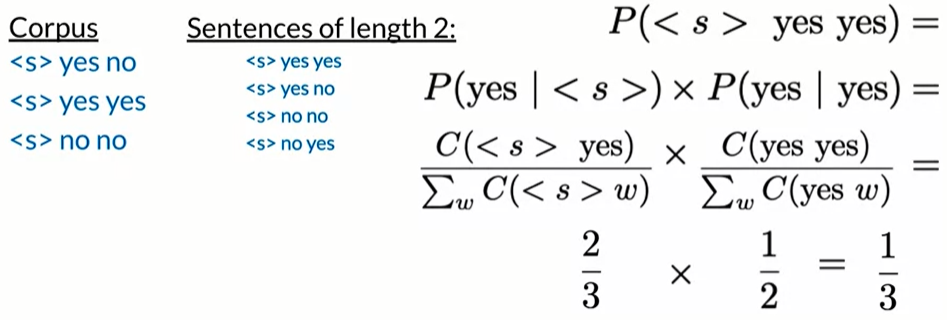

<h2 align='center'><b>The N-gram Language Model<b></h2><br>


**STEP1**<br>
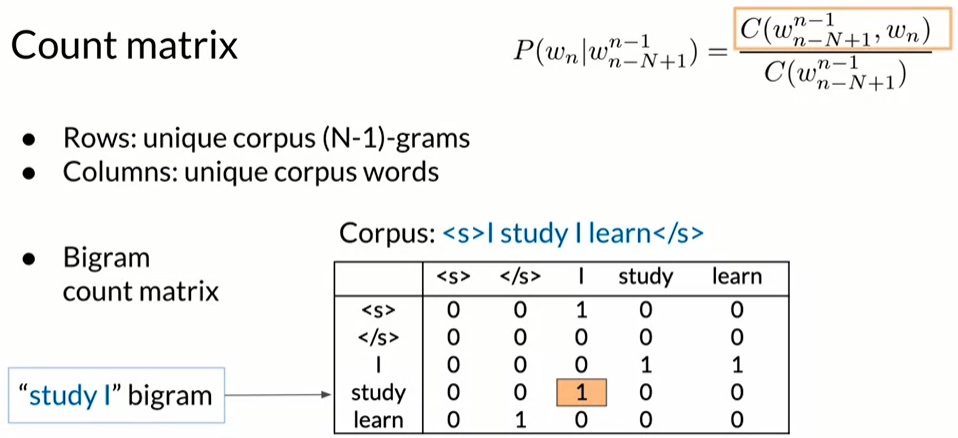

**STEP2**<br>
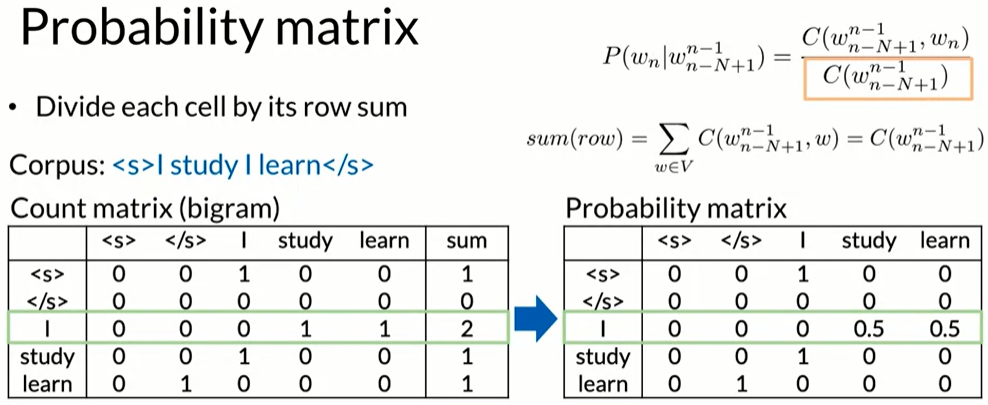

**STEP3**<br>
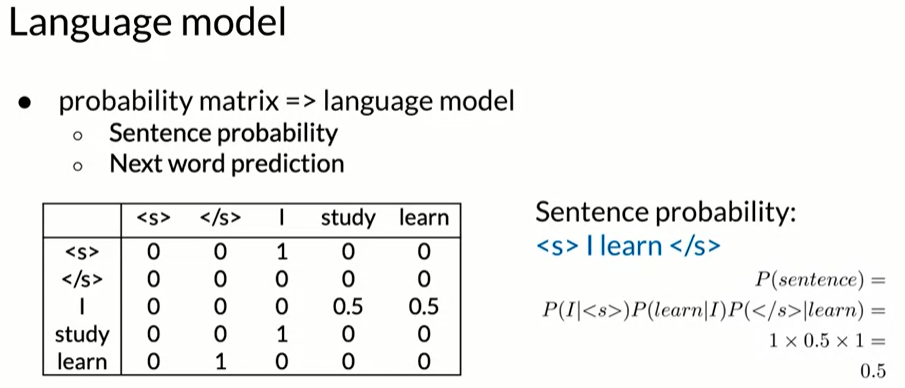

It denotes we have  50% chance of getting the phrase "I Learn" in the entire corpus.

**Drawback :** Since in the language model we multiply different probability values , so at the end the value of the probablity of a given phrase keeps on decreasing the longer the phrase becomes. Computer finds it difficult to store such small floating points and this is called <i>**numerical underflow**</i>. To counter this problem we take log values of the probabilities, as we know log(A*B)=log(A)+log(B). So, taking the log values instead of absolute probabilities can reduce this problem.

**STEP4**<br>
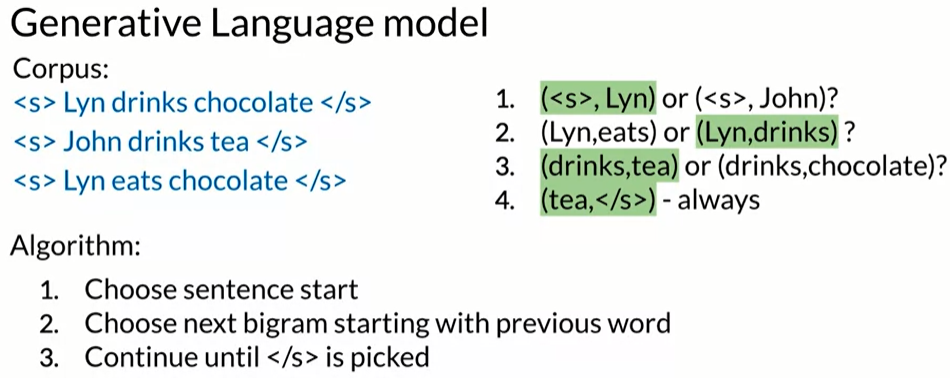

<h2 align='center'><b>Language Model Evaluation</b></h2>

**STEP1 : Splitting the data**<br>
The first step would be to split the data into train, test and validation.Now the split of the text can be done in 2 ways as described below.
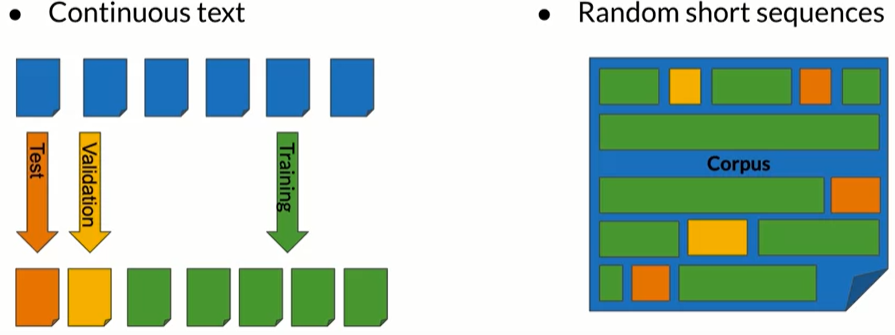

The evaluation matrix that we use is known as **Perplexity**.<br>
Perplexity can be thought of the complexity in a peice of text.A peice of text written by human has low perplexity score as compared to random text generated by Machine. So <u> Lower the Perplexity Score , Better the Model</u>.In some research papers log perplexity instead of perplexity also used.<br>
PP(W)=$\sqrt[m]{\prod_{i}^{m}\frac{1}{P(W_{i}|W_{i-1})}}$=$P(s_{1},s_{2},s_{3},s_{4},...,s_{m})^{-1/m}$<br>
$log_{2}PP(W)$=$\frac{1}{-m}{\sum_{i}^{m}\log_{2}{P(W_{i}|W_{i-1})}}$=$\frac{1}{-m}log_{2}{P(s_{1},s_{2},s_{3},s_{4},...,s_{m})}$<br>
- W -> test set containing m sentences s
- $s_{i}$ -> ith sentence in the test set , each ending with <\/s>
- m -> number of all words in the entire test set W including <\/s> but not \<s>

**Question**<br>
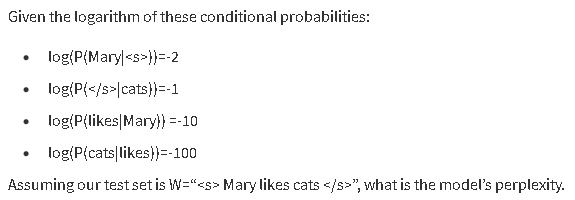<br>
here, Total number of probabilities(Bigram) possible in the test corpus (W),  m=4<br>
So, log(Perplexity)=-1/4(-2-10-100-1)=113/4(ans)

<h4 align='center'> <b>Out of Vocabulary Words </h4>

- Closed Vocabulary :  Consider a chatbot which is designed to only answer a limited set of question. This is an example of closed Vocabulary
- Open Vocabulary : Consider search engine like google or a virtual assistant (Siri/Alexa). Here the word vocabulary has limitless words.In Open vocabulary you may encounter new word outside the vocabulary.Open vocabulary means that you may encounter words from outside the vocabulary, like a name of a new city in the training set <br>
The unknown word is called out of vocabulary word.

To deal with the unknown words we represent all the unknown words with a common replacement **\<UNK>**. The stps are as follows:
1. Create a vocabulary V. While creating the vocabulary we may include different criteria. Such as ,
 - Considering only those words from the corpus which have a frequency of occurance > threshold frequency.
 - Considering the vocabulary of a given size only (say the vocabulary must contain at least 500 words)
 - Considering both the above points as a whole ...etc
2. Replace all the unknown words in the vocabulary by \<UNK>
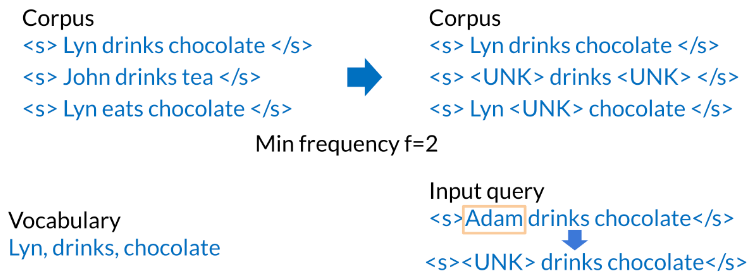
In the example we have chosen min word freq=2, so in the corpus those words wich do not have frequency >=2 will be treated as unknown word and will be replaced by \<UNK>. In the Test set when we use Adam drinks chocolate , then drinks and chocolate are in the vocabulary but not Adam so Adam will be replaced by \<UNK>. In most cases the perplexity score improves while using OOV words.
3. Count the probability of \<UNK> as with any other word.

<h4 align='center'> <b>Missing N-Gram in Training Corpus</h4>

Here the problem we are dealing is , There might be N-Grams that are made of known words but still can be missing from the training corpus.<br>
Say the two words "John" and "eats" both are present in the training corpus but the bigram "John eats" is not present. In this scenario the probability of the bigram "John eats" will be 0.Every N-gram that did not occur will be considered 0. so the count probability will also be considered 0.To encounter this problem we use certain methods called smoothing, backoff or interpolation.<br>

**Method 1 : Smoothing**<br>
In this technique we take each word from a vocabulary and construct a bi-gram/tri-gram/N-gram. Say we have a vocabulary {"John", "Coffee", "drinks"}. Here, possible bigrams will be {"John coffee", "drinks coffee", " john drinks", "coffee john" , "drinks john", "coffee drinks"}. Now here if a bigram appears only once in the corpus then we will get the probability value of 1, otherwise the value we will get will be in fraction.
1. **Add-1 Smoothing**<br>
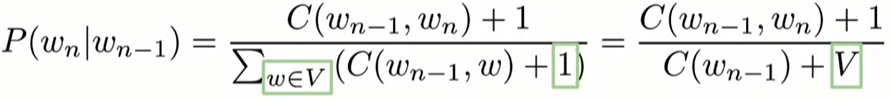
2. **Add-k Smoothing**<br>
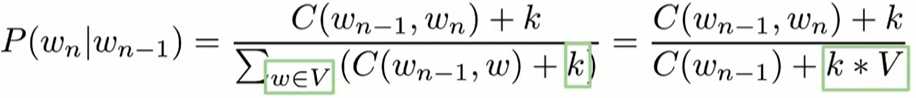


**Question**<br>
Corpus: “I am happy I am learning”<br>
In the context of our corpus, what is the estimated probability of word “can” following the word “I” using the bigram model and add-k-smoothing where k=3.<br>
**Answer**<br>
Corpus =“I am happy I am learning”<br>
V={I,am,happy,learning}.<br>
In the corpus Count of I = 2.<br>
P(I can)=$\frac{Count(Can,I)+k}{Count(I)+k*V}=\frac{0+3}{2+3*4}=\frac{3}{14}$

**Method 2 : Backoff**<br>
1. **Katz Backoff (Probability Discounting)**
2. **Stupid Backoff**

**Method 3 : Interpolation**<br>
Here we assign different weights for different probability values of the N-gram model. The weights are defined by Lambda and thei add upto 1.<br>
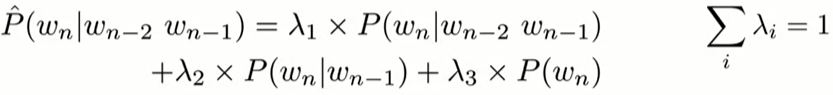<br>
**Example**<br>
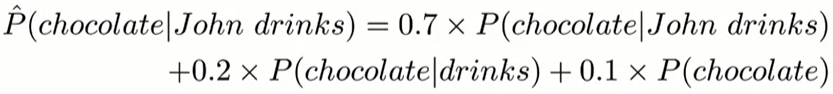

More weights are assigned to the N-grams with higher values of N.

<h2 align='center' > <b>Numerical Representations of Text <b> </h2>

Types of Text representation :
1. Integer Embedding<br>
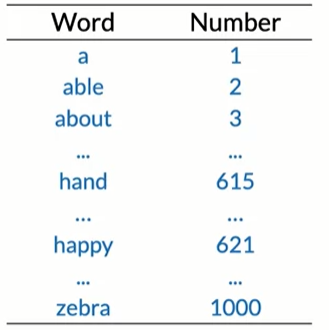

Major drawback of this sort of embedding lies in it's semantic sense. There is no sense in why the word "a" has value of 1 and the word "zebra" has value 1000.

2. One-hot Encoding:<br>
Here we have a square matrix of n*n (n=number of words in the corpus, here n=1000).Here no perticular order of a word exists so the previous probem that we had with integer embedding is eradicated.
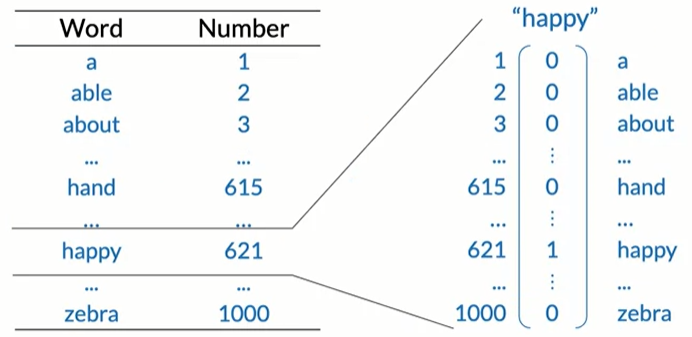<br>
But there are still drawbacks in this embedding:
- The size of the matrix that we get after performing one-hot embedding is genereally very huge.
- Also the embedded words do not carry any meaning. The distance from the word "happy" to the word "paper" and "excited" all are same.
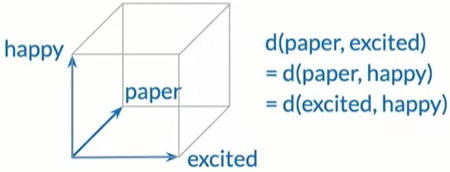

3. **Word Embedding**<br>
Here in this type of embedding we try to put meaning to how words are getting embeded.
- Say the words are distributed along x-axis according to the mood carried forward by each word. Then the distribution will look something like,
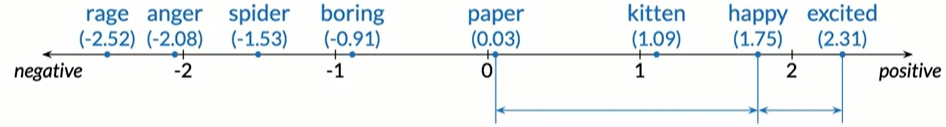<br>
-  Now lets split the words in the y-direction also in the way the meaning is carried.<br>
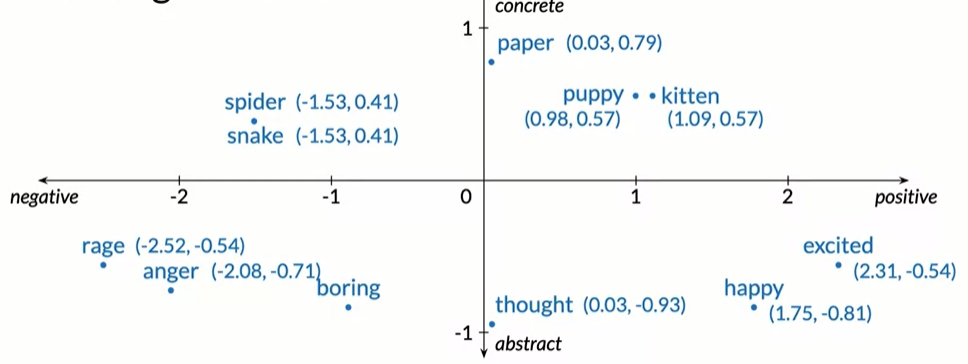

Here as we can see, each 2-d point vector is representative of a word. The words that are closer in meaning have less distance between them and vice versa.The first coordinate represents whether a word is positive or negative. The second coordinate tell you whether the word is abstract or concrete. This is just an example, in the real world you will find embeddings with hundreds of dimensions. You can think of each coordinate as a number telling you something about the word

**Create Word Embedding**<br>
To create word embedding we need 2 things.
1. Text corpus (It has to be a meaningful text, it can be a Novel by Rabindranath Tagore but can't be a list of Keywords as it do not have any meaning)
2. Embedding Method<br>
Its a **Self-Supervised** Learning where the input corpus do not hold any labels but the meaning or context that the text cospus carries generally carries some sort of labels
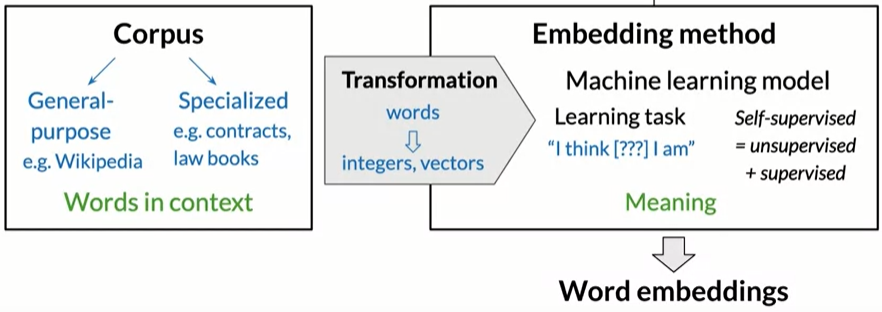

**Word Embedding Methods(ML Models)**
1. Basic Word Embedding Methods:
  - word2vec(Google,2013):<br>
  Uses shallow neural network for the embedding.
      - Continous Bag of Words (CBOW)<br>
      the model learns to predict the center word given some context words.
      - Continous Skip-Gram /Skip-gram with negative sampling(SGNS)<br>
       the model learns to predict the words surrounding a given input word.
  - Global Vectors/ GloVe(Stanford,2014):<br>
  factorizes the logarithm of the corpus's word co-occurrence matrix,  similar to the count matrix you’ve used before.
  - fastText (Facebook,2016)<br>
  based on the skip-gram model and takes into account the structure of words by representing words as an n-gram of characters. It supports out-of-vocabulary (OOV) words.

2. Advanced word Embedding Methods:
Here the pre-trained and tunable models are already available in the internet. We need to fit our own corpus to it to figure out the results.
  - BERT (Google, 2018)
  - ELMo (Allen Institute for AI, 2018)
  - GPT-2 (OpenAI, 2018)

<h2 align='center'><b>Continuous Bag-of-Words Model</b></h2>

**Continuous Bag-of-Words Embedding Process**<br>
As discussed earlier before, we need a corpus with significant context. Next we would need to transform the corpus as required to fit it into the ML model.In CBOW model our intention will be to predict the missing word from the sorrounding words.<br>
So here we predict the Centre-word aka Rationale.<br>
The_____ is Barking. Our intention is to fill the blank with suitable word, in this case it's dog.

**Training Example of CBOW**<br>
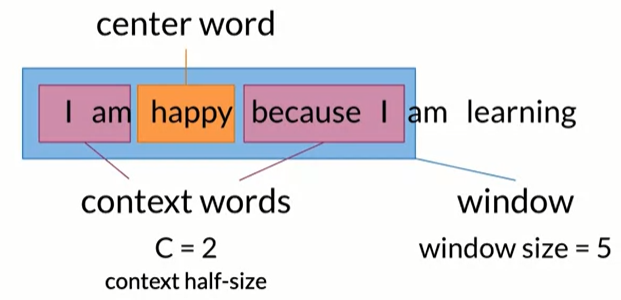<br>
The context size, C, is 2. C usually tells you how many words before or after the center word the model will use to make the prediction

For the corpus we keep sliding the wondow from left to right and for each window we keep on writting the **Context words** and **Centre Words** to create the dataset which we use to fit into our CBOW ML model.<br>
- Window1
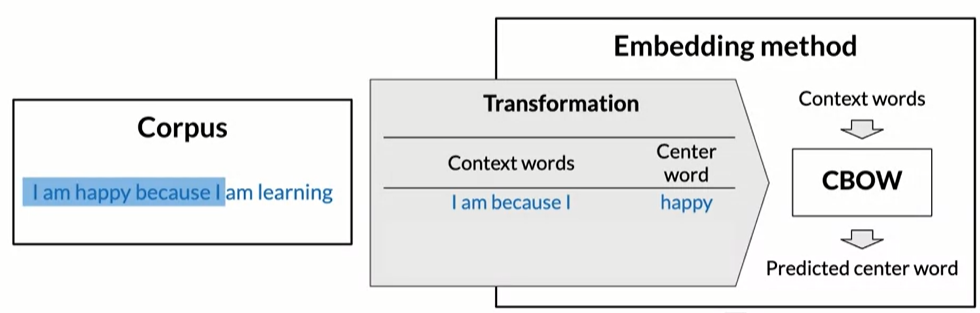
- Window 2<br>
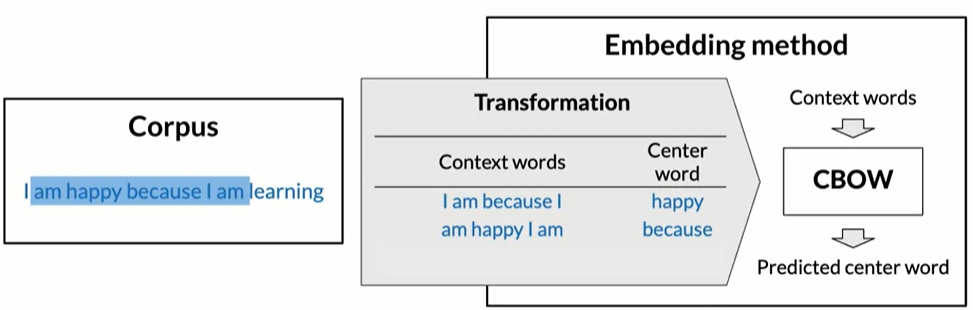
- Window 3 <br>
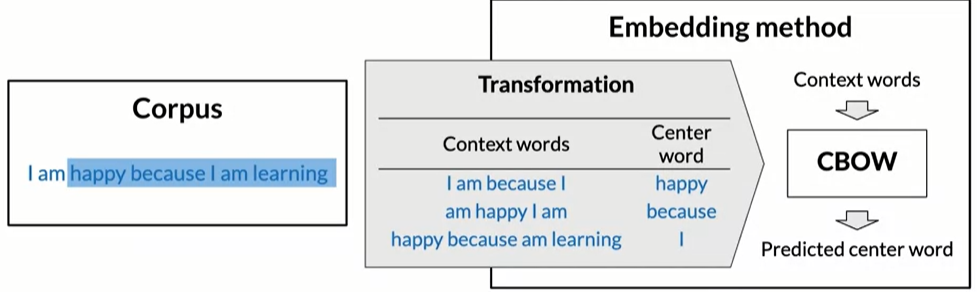

- Summary<br>
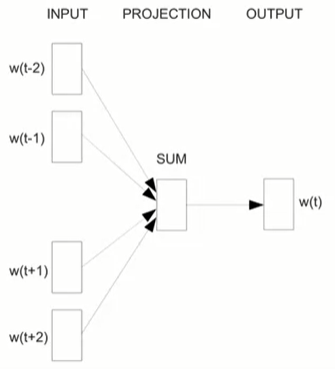

In [ ]:
#### Sliding Window in Python #####

def get_window(words, c):
  i=c
  while i <len(words)-c:
    center_word=words[i]
    context_words=words[(i-c):i]+words[(i+1):(i+c+1)]
    yield context_words, center_word
    i+=1

for x,y in get_window(['I','am','happy','because','I','am','learning'],2):
  print(f'{x}\t{y}')

['I', 'am', 'because', 'I']	happy
['am', 'happy', 'I', 'am']	because
['happy', 'because', 'am', 'learning']	I


<h4 align='center'> <b>Data Preparation</b> </h5>

Perform these steps first in the corpus:
1. Cleaning:<br>
  - Convert each word into small case
  - remove all the punctuation symbols
  - remove all the numbers and special characters
  - Treat special words in special way (eg : #metoo)
  - Convert emojis to words to get the context of each emoji.
2. Transforming:

**Transforming Centre-word into Vector**<br>
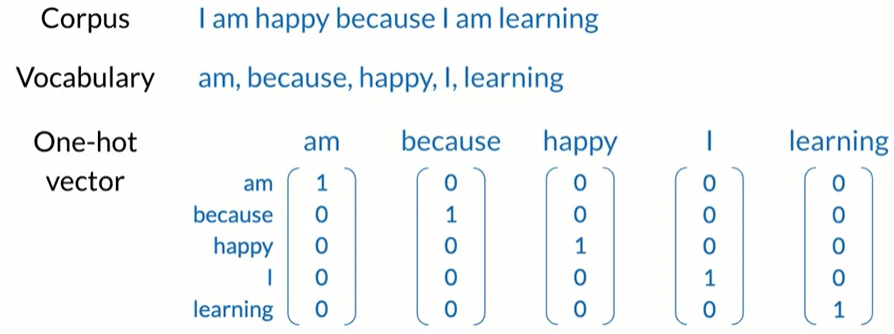

**Transforming context-word into vector**<br>
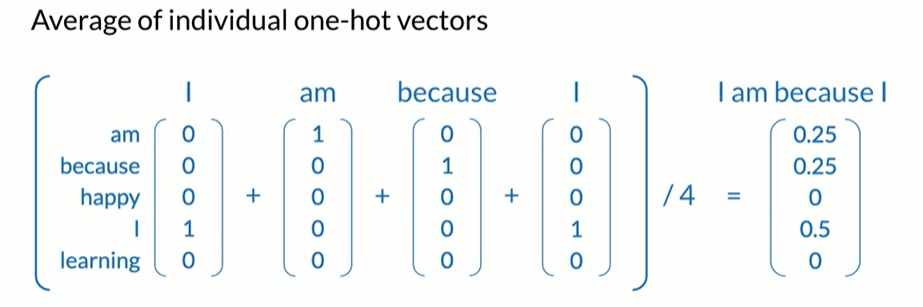

**Final-Training Set**<br>
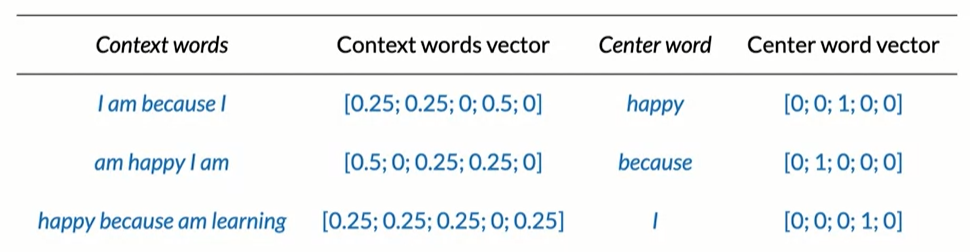

<h4 align='center'> <b>Model Building</b> </h5>

***CBOW architecture for a single input example***<br>
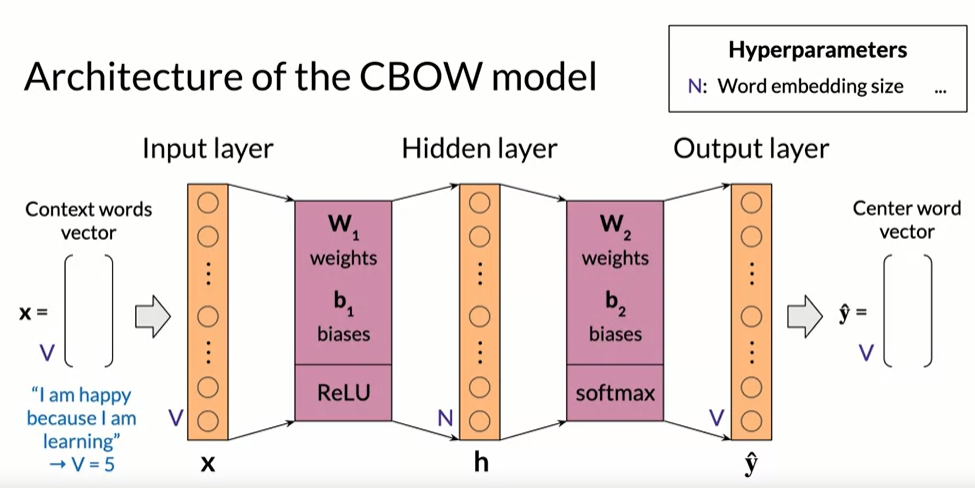

***CBOW Architecture for m training examples all with window size V***
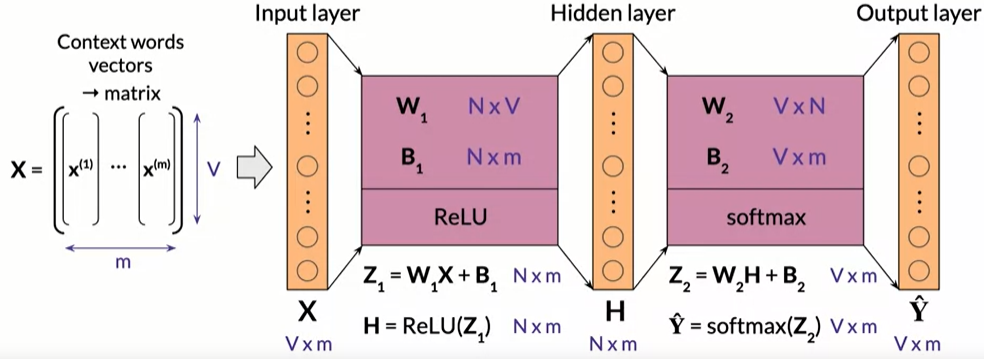

**Dimensions of Wights and Bises**<br>
- **For single Context-words input (Input = V\*1 )**
1. Dimension of input X= (V\*1)
2. Dimension of Weight W1= (Size of hidden layer)\*(Size of Input)= (N\*V)
3. Dimension of Bias  b1= (Size of hidden layer)\*1 = (N\*1)
4. Dimension of Z1= (N\*1)
5. Dimension of Weight W2 = (Size of output)\*(Size of hidden layer)= (V\*N)
6. Dimension of Bias b2= (Size of output layer)\*1 = (V\*1)
7. Dimension of Z2= (V*1)
8. Dimension of $\widehat{Y}$= (V\*1)


- **For Multiple context word input (Input = V\*m)**<br>
1. Dimension of input X= (V\*m)
2. Dimension of Weight W1= (Size of hidden layer)\*(Size of Input)= (N\*V)
3. Dimension of Bias  b1= (Size of hidden layer)\*1 = (N\*m)
4. Dimension of Z1= (N\*m)
5. Dimension of Weight W2 = (Size of output)\*(Size of hidden layer)= (V\*N)
6. Dimension of Bias b2= (Size of output layer)\*1 = (V\*m)
7. Dimension of Z2= (V*m)
8. Dimension of $\widehat{Y}$= (V\*m)

**Question 1**<br>
You are designing a neural network for a CBOW model that will be trained on a corpus with a vocabulary of 8000 words. If you want it to learn 400-dimensional word embedding vectors, what should be the sizes of the input, hidden, and output layers?<br>
**Answer**=8000(Input Layer), 400(Hidden Layer), 8000(Output Layer)<br>

**Question 2**<br>
If you are designing a neural network for a CBOW model that will be trained on a corpus of 8000 words, and if you want it to learn 400-dimensional word embedding vectors, what should be the size of W1, the weighting matrix between the input layer and hidden layer, if it is fed training examples in batches of 16 examples represented by a 8000 row by 16 column matrix?<br>
**Answer**= (400*8000)

<h4 align='center'> <b>Loss and Cost function in CBOW</b> </h5>

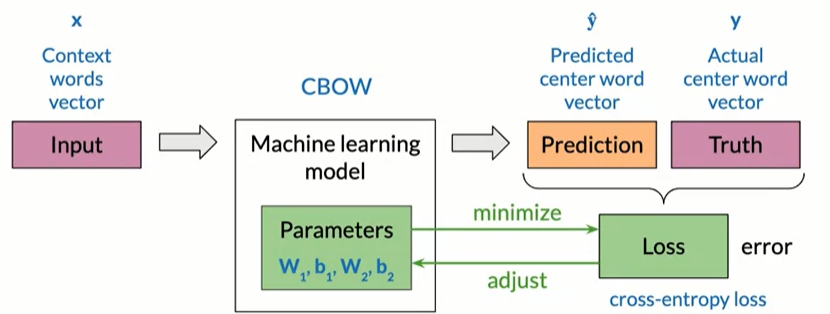

***Cross Entropy Loss=Log Loss = Loss of one single training Example= <br>$J_{}^{i}=-\sum_{k=1}^{V}y_{k}log\widehat{y}_{k}$***<br>
***Cost Function***=Mean of the Loss for each batch of input to the model in each epoch =<br>$J_{batch}=\frac{i}{m}\sum_{i=1}^{m}J_{}^{i}=-\frac{i}{m}\sum_{i=1}^{m}\sum_{j=1}^{V}y_{j}^{i}log\widehat{y}_{j}^{i}$<br>
 m= Batch Size <br>
 i= column<br>
 j= row<br>
 V= number of rows<br>
 y= actual value of centre word <br>
 $\widehat{y}$= Predicted value of y
<br><br>
Our point of Focus is to minimise the loss function with each epoch by updating the W and b parameters.

<h4 align='center'> <b>Minimising the cost</b> </h5>

1. **Back-Propagation**<br>
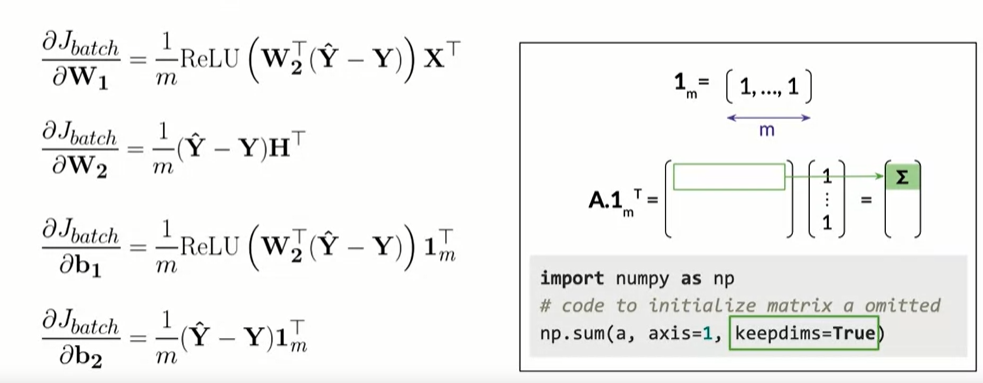
2. **Gradient-descent**<br>
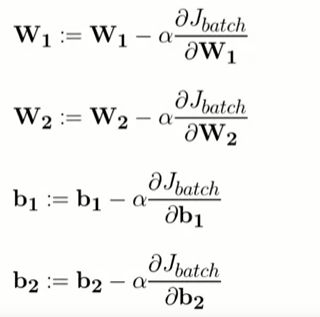

<h4 align='center'> <b>Extracting word embedding vectors from tarined Model</b> </h5>

1. **Option 1**<br>
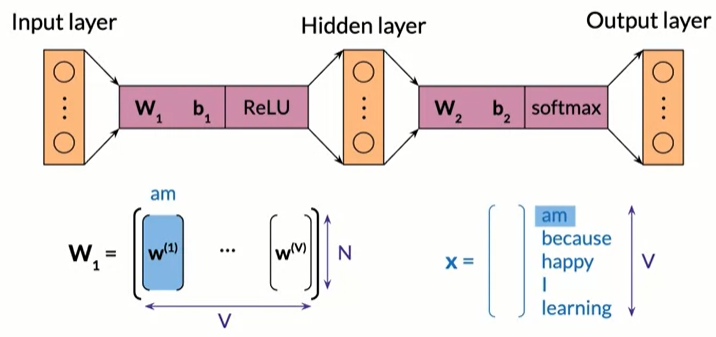

**Option 2**<br>
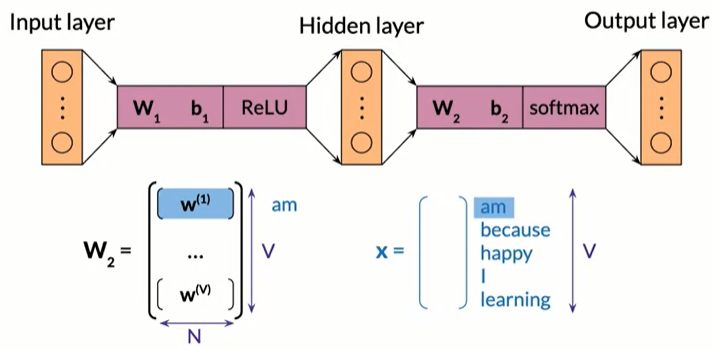

**Option 3**<br>
Averaging the previous two extractions.<br>
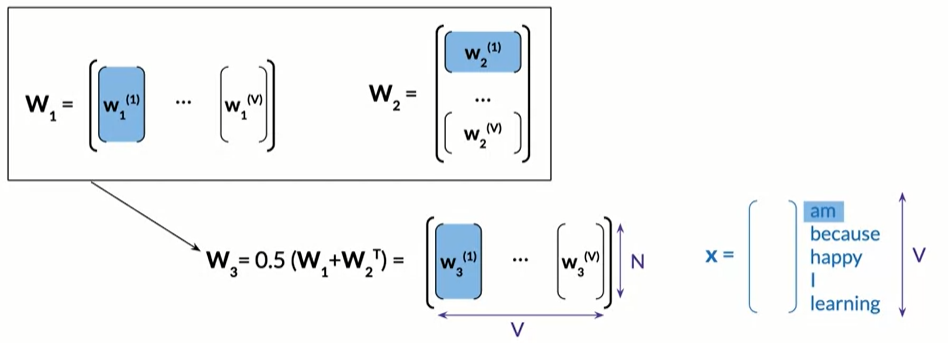

<h4 align='center'> <b>Evaluating Word Embeddings</b> </h5>

1. **Intrinsic Evaluation**<br>
Intrinsic Evaluation assess how well the word embeddings is able to capture the semantic and syntactic relationship between the words.<br>
Semantics = Meaning or Context , Syntactic = Grammar.<br>
This testing can be carried out in 2 ways:<br>
> ***Analogies:***<br>
We can test the model with feeding the model with the following examples.<br>
  -Semantic: France is to Paris as Italy is to_______,<br>
  -Syntactic: "Seen" is to "see" as "been" is to_____________<br>
  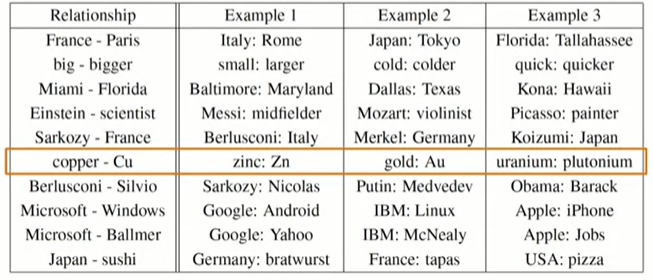<br>
> ***Clustering:***<br>
We can test the model by clustering the words. The words carrying similar emotions will be closely associated, whereas the words carrying very different emotions will be distant apart.
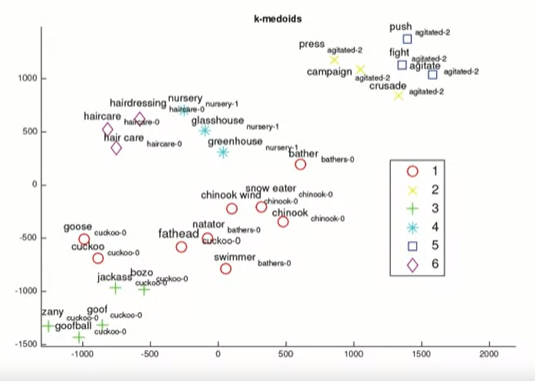  <br>
> ***Visualization***<br>
Considering Human level inputs to test the  model performance.



2. **Extrinsic Evaluation**<br>
Here, to test the model, we need to need to test the model as a whole for the task it was build for. But its time consuming and very difficult to fine tune the performance and troubleshoot.<br>
Example : Parts of speech tagging, Named Entity etc

**Drawbacks of  N-Gram Models**<br>
1. In order to capture dependencies between distant words the model has to esatablish conditional probability for a very large sequence of words. This can be difficult for correspondingly large corpora.
2. And to store the conditional probility and even to compute the probability for such large corpora, the model uses very large space of RAM.